In [1]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
def read_dat_file(file_path):
    rows=[]
    try:
        with open(file_path, 'r') as file:
            # Assuming it's a text file, you can read its contents line by line
            for line in file:
                mylist=line.split(",")
                rows.append(mylist)
    except FileNotFoundError:
        print(f"File '{file_path}' not found.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

    df=pd.DataFrame(rows,columns=['motor', 'screw', 'pgain', 'vgain', 'class'])
    df = df.replace('\n','', regex=True)
    return df

Categorical features are converted to Integer based on Frequency Encoding.It Replaces each category with its frequency of occurrence in the dataset. It also p
Preserves information about the distribution of categories but does not introduce additional dimensions

In [3]:
df = read_dat_file("servo.data")
print(df.head())
print(df.info())

## Converting categorical features to integer based on frequency encoding
frequency_encoding1 = df['motor'].value_counts()
df['motor'] = df['motor'].map(frequency_encoding1)

frequency_encoding2 = df['screw'].value_counts()
df['screw'] = df['screw'].map(frequency_encoding2)

df = df[df.columns].astype(float)
print(df.head())

  motor screw pgain vgain        class
0     E     E     5     4   0.28125095
1     B     D     6     5    0.5062525
2     D     D     4     3   0.35625148
3     B     A     3     2     5.500033
4     D     B     6     5   0.35625148
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   motor   167 non-null    object
 1   screw   167 non-null    object
 2   pgain   167 non-null    object
 3   vgain   167 non-null    object
 4   class   167 non-null    object
dtypes: object(5)
memory usage: 6.6+ KB
None
   motor  screw  pgain  vgain     class
0   33.0   29.0    5.0    4.0  0.281251
1   36.0   30.0    6.0    5.0  0.506252
2   22.0   30.0    4.0    3.0  0.356251
3   36.0   42.0    3.0    2.0  5.500033
4   22.0   35.0    6.0    5.0  0.356251


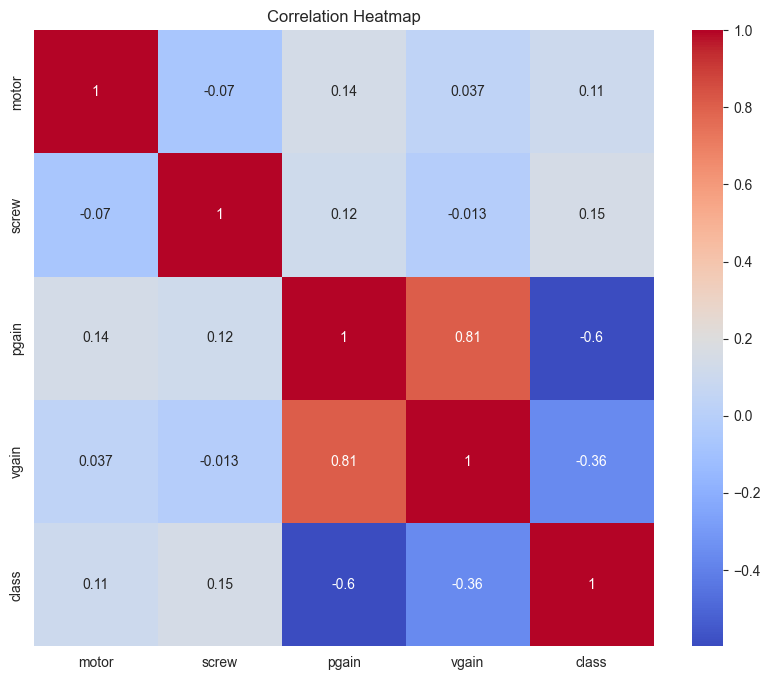

In [4]:
plt.figure(figsize = (10, 8))
correlations = df.corr()
sns.heatmap(correlations, annot = True, cmap = "coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Building Isolation Forest Model

In [5]:
anomaly_inputs = ['motor', 'screw','pgain', 'vgain']
model = IsolationForest(contamination=0.1, random_state=42)
model.fit(df[anomaly_inputs])
df['anomaly_scores'] = model.decision_function(df[anomaly_inputs])
df['anomaly'] = model.predict(df[anomaly_inputs])
df.loc[:, [ 'motor', 'screw', 'pgain', 'vgain', 'anomaly_scores', 'anomaly']]

,motor,screw,pgain,vgain,anomaly_scores,anomaly
0,33.0,29.0,5.0,4.0,0.038195,1
1,36.0,30.0,6.0,5.0,0.087777,1
2,22.0,30.0,4.0,3.0,0.014881,1
3,36.0,42.0,3.0,2.0,0.068566,1
4,22.0,35.0,6.0,5.0,-0.074869,-1
...,...,...,...,...,...,...
162,36.0,31.0,3.0,2.0,0.126098,1
163,36.0,29.0,3.0,1.0,0.099499,1
164,40.0,30.0,4.0,3.0,0.094907,1
165,36.0,35.0,3.0,2.0,0.097021,1


Orange -> Outiers
Blue -> Inliers


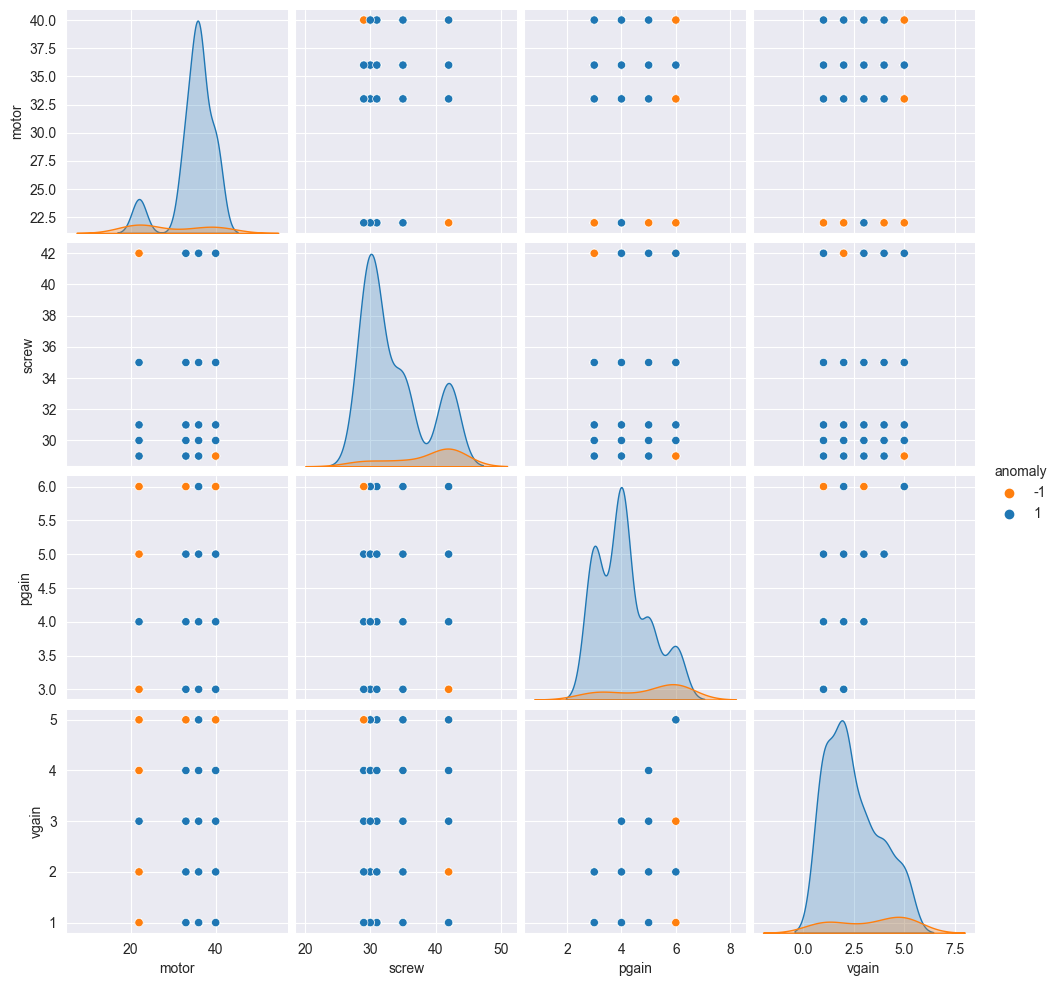

In [6]:
palette = ['#ff7f0e', '#1f77b4']
print('Orange -> Outiers')
print('Blue -> Inliers')
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

### Outliers and Inliers

In [7]:
print('Outliers')
df[df['anomaly'] == -1]

Outliers


,motor,screw,pgain,vgain,class,anomaly_scores,anomaly
4,22.0,35.0,6.0,5.0,0.356251,-0.074869,-1
8,40.0,42.0,6.0,5.0,0.768754,-0.025927,-1
9,22.0,42.0,4.0,1.0,1.031254,-0.010847,-1
36,22.0,29.0,3.0,1.0,0.500000,-0.007302,-1
38,40.0,35.0,6.0,5.0,0.543753,-0.011260,-1
50,22.0,42.0,6.0,5.0,0.431252,-0.089522,-1
63,40.0,42.0,6.0,1.0,0.543753,-0.034689,-1
64,22.0,42.0,4.0,3.0,0.731254,-0.001248,-1
84,33.0,42.0,6.0,5.0,0.581253,-0.018037,-1
93,40.0,42.0,6.0,3.0,0.543753,-0.001781,-1


In [8]:
print('Inliers')
df[df['anomaly'] == 1]

Inliers


,motor,screw,pgain,vgain,class,anomaly_scores,anomaly
0,33.0,29.0,5.0,4.0,0.281251,0.038195,1
1,36.0,30.0,6.0,5.0,0.506252,0.087777,1
2,22.0,30.0,4.0,3.0,0.356251,0.014881,1
3,36.0,42.0,3.0,2.0,5.500033,0.068566,1
5,33.0,31.0,4.0,3.0,0.806255,0.098029,1
...,...,...,...,...,...,...,...
162,36.0,31.0,3.0,2.0,4.499986,0.126098,1
163,36.0,29.0,3.0,1.0,3.699967,0.099499,1
164,40.0,30.0,4.0,3.0,0.956256,0.094907,1
165,36.0,35.0,3.0,2.0,4.499986,0.097021,1
